![Verne](https://www.vernegroup.com/wp-content/uploads/2020/07/LOGO-VERNE-TECHNOLOGY-GROUP-3.png)

# Analizando nuestras ventas

In [ ]:
import sqlite3
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Crear la conexión a la base de datos

conn = sqlite3.connect('/content/drive/MyDrive/Datos/Tiendas24H.sqlite')



In [ ]:
consulta = "SELECT C.Ticket, Fecha, D.ImporteVenta , D.Cantidad , D.ImporteCoste , ImporteVenta - ImporteCoste as 'Margen' , D.CodProducto , C.CodTienda FROM VentasCAB C INNER JOIN VentasDET D ON C.Ticket = D.Ticket"

In [ ]:
TM = pd.read_sql_query(consulta,conn)

In [ ]:
TM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615263 entries, 0 to 615262
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Ticket        615263 non-null  object 
 1   Fecha         615263 non-null  object 
 2   ImporteVenta  615263 non-null  float64
 3   Cantidad      615263 non-null  float64
 4   ImporteCoste  615263 non-null  float64
 5   Margen        615263 non-null  float64
 6   CodProducto   615263 non-null  object 
 7   CodTienda     615263 non-null  object 
dtypes: float64(4), object(4)
memory usage: 37.6+ MB


In [ ]:
TM.head()

,Ticket,Fecha,ImporteVenta,Cantidad,ImporteCoste,Margen,CodProducto,CodTienda
0,S1-12-001-1000812,2019-08-24,1.1815,1.0,0.8625,0.3190,03000234,001
1,S1-12-001-1001435,2019-08-25,0.4760,2.0,0.2645,0.2115,03000630,001
2,S1-12-001-1003244,2019-08-29,1.2580,1.0,0.7475,0.5105,01000124,001
3,S1-12-001-1004042,2019-08-31,0.8670,1.0,0.4255,0.4415,04000383,001
4,S1-12-001-1004462,2019-08-31,1.1815,1.0,0.8625,0.3190,03000234,001


In [ ]:
TM.isnull().sum().sort_values(ascending=False)

CodTienda       0
CodProducto     0
Margen          0
ImporteCoste    0
Cantidad        0
ImporteVenta    0
Fecha           0
Ticket          0
dtype: int64

In [ ]:
# Convertimos la fecha a un formato fecha

TM['Fecha'] = pd.to_datetime(TM.Fecha, format='%Y/%m/%d')
TM.head()

,Ticket,Fecha,ImporteVenta,Cantidad,ImporteCoste,Margen,CodProducto,CodTienda
0,S1-12-001-1000812,2019-08-24,1.1815,1.0,0.8625,0.3190,03000234,001
1,S1-12-001-1001435,2019-08-25,0.4760,2.0,0.2645,0.2115,03000630,001
2,S1-12-001-1003244,2019-08-29,1.2580,1.0,0.7475,0.5105,01000124,001
3,S1-12-001-1004042,2019-08-31,0.8670,1.0,0.4255,0.4415,04000383,001
4,S1-12-001-1004462,2019-08-31,1.1815,1.0,0.8625,0.3190,03000234,001


In [ ]:
TM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615263 entries, 0 to 615262
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Ticket        615263 non-null  object        
 1   Fecha         615263 non-null  datetime64[ns]
 2   ImporteVenta  615263 non-null  float64       
 3   Cantidad      615263 non-null  float64       
 4   ImporteCoste  615263 non-null  float64       
 5   Margen        615263 non-null  float64       
 6   CodProducto   615263 non-null  object        
 7   CodTienda     615263 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 37.6+ MB


In [ ]:
TM['Ticket'] = TM['Ticket'].astype('string')
TM['CodProducto'] = TM['CodProducto'].astype('string')
TM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615263 entries, 0 to 615262
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Ticket        615263 non-null  string        
 1   Fecha         615263 non-null  datetime64[ns]
 2   ImporteVenta  615263 non-null  float64       
 3   Cantidad      615263 non-null  float64       
 4   ImporteCoste  615263 non-null  float64       
 5   Margen        615263 non-null  float64       
 6   CodProducto   615263 non-null  string        
 7   CodTienda     615263 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(1), string(2)
memory usage: 37.6+ MB


In [ ]:
TM.describe().round(2)

,ImporteVenta,Cantidad,ImporteCoste,Margen
count,615263.00,615263.00,615263.00,615263.00
mean,1.75,1.09,1.32,0.43
std,2.60,0.76,2.97,2.47
min,-364.40,-32.00,-56.49,-1618.36
25%,0.87,1.00,0.56,0.23
50%,1.18,1.00,0.91,0.40
75%,1.81,1.00,1.29,0.57
max,364.40,350.00,1618.36,363.74


In [ ]:
# Eliminamos las ventas con cantidades negativas

TM = TM[TM.Cantidad > 0]

In [ ]:
TM.describe().round(2)

,ImporteVenta,Cantidad,ImporteCoste,Margen
count,611373.00,611373.00,611373.00,611373.00
mean,1.78,1.11,1.34,0.44
std,2.50,0.73,2.95,2.43
min,0.00,0.24,-16.55,-1618.36
25%,0.87,1.00,0.56,0.23
50%,1.20,1.00,0.91,0.40
75%,1.81,1.00,1.29,0.57
max,364.40,350.00,1618.36,363.74


In [ ]:
#añadimos una columna para ver el importe total gastad0

TM['ImporteTotal'] = TM['Cantidad'] * TM['ImporteVenta']
TM.head()

,Ticket,Fecha,ImporteVenta,Cantidad,ImporteCoste,Margen,CodProducto,CodTienda,ImporteTotal
0,S1-12-001-1000812,2019-08-24,1.1815,1.0,0.8625,0.3190,03000234,001,1.1815
1,S1-12-001-1001435,2019-08-25,0.4760,2.0,0.2645,0.2115,03000630,001,0.9520
2,S1-12-001-1003244,2019-08-29,1.2580,1.0,0.7475,0.5105,01000124,001,1.2580
3,S1-12-001-1004042,2019-08-31,0.8670,1.0,0.4255,0.4415,04000383,001,0.8670
4,S1-12-001-1004462,2019-08-31,1.1815,1.0,0.8625,0.3190,03000234,001,1.1815


In [ ]:
# Añadimos columnas para Año, mes y día

TM.insert(loc=2, column='Año_Mes', value=TM['Fecha'].map(lambda x: 100*x.year + x.month))
TM.insert(loc=3, column='Mes', value=TM['Fecha'].dt.month)
# +1 to make Monday=1.....until Sunday=7
TM.insert(loc=4, column='Dia', value=(TM['Fecha'].dt.dayofweek)+1)

TM.head()


,Ticket,Fecha,Año_Mes,Mes,Dia,ImporteVenta,Cantidad,ImporteCoste,Margen,CodProducto,CodTienda,ImporteTotal
0,S1-12-001-1000812,2019-08-24,201908,8,6,1.1815,1.0,0.8625,0.3190,03000234,001,1.1815
1,S1-12-001-1001435,2019-08-25,201908,8,7,0.4760,2.0,0.2645,0.2115,03000630,001,0.9520
2,S1-12-001-1003244,2019-08-29,201908,8,4,1.2580,1.0,0.7475,0.5105,01000124,001,1.2580
3,S1-12-001-1004042,2019-08-31,201908,8,6,0.8670,1.0,0.4255,0.4415,04000383,001,0.8670
4,S1-12-001-1004462,2019-08-31,201908,8,6,1.1815,1.0,0.8625,0.3190,03000234,001,1.1815


In [ ]:
# Número de Tickets por Producto y Tienda

ventas = TM.groupby(by=['CodProducto','CodTienda'], as_index=False)['Ticket'].count()

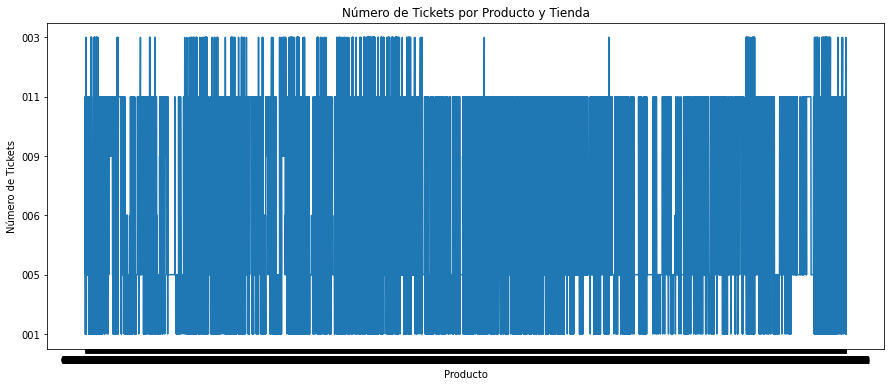

In [ ]:
plt.subplots(figsize=(15,6))
plt.plot(ventas.CodProducto, ventas.CodTienda)
plt.xlabel('Producto')
plt.ylabel('Número de Tickets')
plt.title('Número de Tickets por Producto y Tienda')
plt.show()

In [ ]:
print('Los 5 productos más vendidos...')
ventas.sort_values(by='Ticket', ascending=False).head()

Los 5 productos más vendidos...


,CodProducto,CodTienda,Ticket
455,02000341,011,20290
2150,04000383,005,18541
893,02001491,005,16070
748,02000710,005,12608
2149,04000383,001,11904


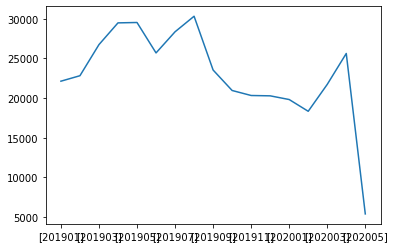

In [ ]:
TM.groupby('Ticket')['Año_Mes'].unique().value_counts().sort_index().plot()


In [ ]:
# Tickets por día
TM.groupby('Ticket')['Dia'].unique().value_counts().sort_index()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1]    58465
[2]    54913
[3]    55174
[4]    57875
[5]    55345
[6]    54565
[7]    54704
Name: Dia, dtype: int64

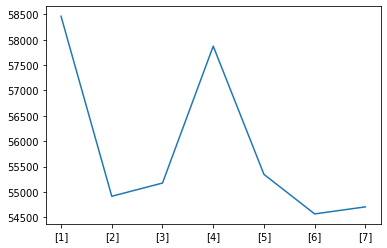

In [ ]:
TM.groupby('Ticket')['Dia'].unique().value_counts().sort_index().plot()

In [ ]:
# Patrones de Precio unitario
TM['ImporteVenta'].describe()

count    611373.000000
mean          1.783490
std           2.498879
min           0.000000
25%           0.867000
50%           1.198500
75%           1.810500
max         364.395000
Name: ImporteVenta, dtype: float64

In [ ]:
# Productos "regalados"

regalos = TM[TM['ImporteVenta'] == 0]
regalos.head()

,Ticket,Fecha,Año_Mes,Mes,Dia,ImporteVenta,Cantidad,ImporteCoste,Margen,CodProducto,CodTienda,ImporteTotal
120434,S3-12-005-2310121,2019-03-19,201903,3,2,0.0,1.0,0.92,-0.92,02000710,005,0.0
120435,S3-12-005-2310122,2019-03-19,201903,3,2,0.0,1.0,0.92,-0.92,02000710,005,0.0
120440,S3-12-005-2310125,2019-03-19,201903,3,2,0.0,1.0,0.92,-0.92,02000710,005,0.0
120446,S3-12-005-2310129,2019-03-19,201903,3,2,0.0,1.0,0.92,-0.92,02000710,005,0.0
120449,S3-12-005-2310133,2019-03-19,201903,3,2,0.0,1.0,0.92,-0.92,02000710,005,0.0


In [ ]:
# Distribución de Regalos por día de la semana

TM["Dia"].value_counts().sort_index()

1    95962
2    86697
3    84092
4    88848
5    84459
6    84870
7    86445
Name: Dia, dtype: int64

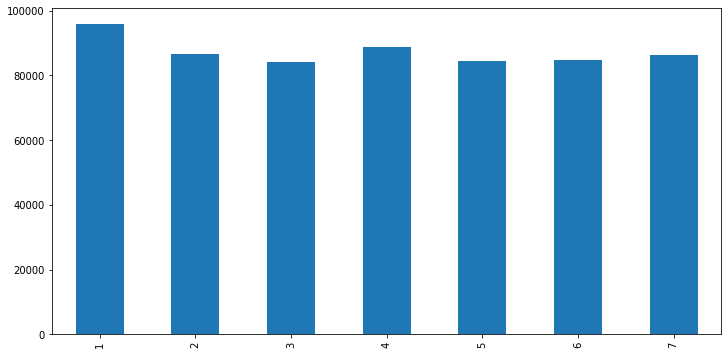

In [ ]:
ax = TM["Dia"].value_counts().sort_index().plot(kind='bar',figsize=(12,6))
plt.show()

In [ ]:
#Pivot Tables. Cantidad de Productos regalados por Tienda
regalos.pivot_table('Cantidad' , index='CodProducto' , columns ='CodTienda')

CodTienda,001,003,005,006,009,011
CodProducto,,,,,,
01000003,NaN,NaN,NaN,NaN,1.00,NaN
02000099,NaN,NaN,NaN,NaN,NaN,1.000000
02000234,NaN,NaN,1.000000,NaN,NaN,NaN
02000278,NaN,NaN,NaN,NaN,1.00,NaN
02000292,NaN,NaN,NaN,NaN,1.00,NaN
02000519,NaN,NaN,1.000000,1.000000,NaN,NaN
02000654,1.000000,NaN,NaN,NaN,NaN,NaN
02000708,1.068493,1.164311,1.079404,1.428571,1.24,1.735568
02000710,1.137133,NaN,1.001137,1.000300,NaN,NaN


In [ ]:
regalos.pivot_table('Cantidad' , index='CodProducto' , columns ='CodTienda' , aggfunc = 'sum',fill_value = 0)

CodTienda,001,003,005,006,009,011
CodProducto,,,,,,
01000003,0,0,0,0,1,0
02000099,0,0,0,0,0,1
02000234,0,0,2,0,0,0
02000278,0,0,0,0,1,0
02000292,0,0,0,0,1,0
02000519,0,0,1,2,0,0
02000654,1,0,0,0,0,0
02000708,78,659,435,20,217,932
02000710,2015,0,12322,6674,0,0


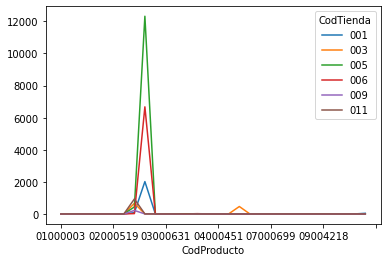

In [ ]:
regalos.pivot_table('Cantidad' , index='CodProducto' , columns ='CodTienda' , aggfunc = 'sum',fill_value = 0).plot()

In [ ]:
regalos.pivot_table('Cantidad' , index='CodProducto' , columns ='CodTienda' , aggfunc = 'sum',fill_value = 0)

CodTienda,001,003,005,006,009,011
CodProducto,,,,,,
01000003,0,0,0,0,1,0
02000099,0,0,0,0,0,1
02000234,0,0,2,0,0,0
02000278,0,0,0,0,1,0
02000292,0,0,0,0,1,0
02000519,0,0,1,2,0,0
02000654,1,0,0,0,0,0
02000708,78,659,435,20,217,932
02000710,2015,0,12322,6674,0,0


In [ ]:
regalos.pivot_table(['Cantidad' ,'ImporteCoste'] , index= ['CodProducto' , 'CodTienda'] , columns = ['Año_Mes' , 'Mes'] , aggfunc = {'Cantidad' : 'sum' , 'ImporteCoste' : 'mean'},fill_value = 0)

Cantidad                ... ImporteCoste                    
Año_Mes                 201901 201902 201903  ...       202003    202004    202005
Mes                          1      2      3  ...            3         4         5
CodProducto CodTienda                         ...                                 
01000003    009              0      1      0  ...       0.0000  0.000000  0.000000
02000099    011              0      0      0  ...       0.0000  0.000000  0.000000
02000234    005              0      0      0  ...       0.0000  0.000000  0.000000
02000278    009              0      1      0  ...       0.0000  0.000000  0.000000
02000292    009              1      0      0  ...       0.0000  0.000000  0.000000
02000519    005              0      0      0  ...       0.0000  2.300000  0.000000
            006              2      0      0  ...       0.0000  0.000000  0.000000
02000654    001              0      0      0  ...       0.0000  0.805000  0.000000
02000708    001              0      0      0  ...       0.0000  0.000000  0.000000
            003              0      0      0  ...       0.0000  0.000000  0.000000
            005              0      0      0  ...       0.0000  0.000000  0.000000
            006              0      0      0  ...       0.0000  0.000000  0.000000
            009              0      0      0  ...       0.0000  0.000000  0.000000
            011              0      0      0  ...       0.0000  0.000000  0.000000
02000710    001              4      8      4  ...       0.0000  0.927609  0.922190
            005             14    142   1754  ...       0.0000  0.923976  0.923948
            006            152   1754   1534  ...       0.0000  0.920000  0.920000
03000521    005              0      0      1  ...       0.0000  0.000000  0.000000
03000631    011              0      0      0  ...       0.0000  0.000000  0.000000
04000094    011              0      0      0  ...       0.0000  0.000000  0.000000
04000129    009              0      0      2  ...       0.0000  0.000000  0.000000
            011              0      1      1  ...       0.0000  0.000000  0.000000
04000383    001              1      0      0  ...       0.0000  0.000000  0.000000
            005              0      0      1  ...       0.0000  0.000000  0.000000
            006             12      4      0  ...       0.0000  0.000000  0.000000
04000441    009              0      0      0  ...       0.0000  0.000000  0.000000
04000451    009              0      1      0  ...       0.0000  0.000000  0.000000
04000458    003              3      0      5  ...       0.0000  0.000000  0.000000
04000459    003             25     63     49  ...       0.3795  0.379500  0.379500
            009              2      0      0  ...       0.0000  0.000000  0.000000
05000065    009              0      0      0  ...       0.0000  0.000000  0.000000
07000005    006              1      0      0  ...       0.0000  0.000000  0.000000
07000699    005              0      0      0  ...       0.0000  0.000000  0.000000
09003694    011              0      0      0  ...       0.0000  0.000000  0.000000
09003744    005              0      0      0  ...       0.0000  0.000000  0.000000
09004198    011              0      0      0  ...       0.0000  0.000000  0.000000
09004199    011              0      0      0  ...       0.0000  0.000000  0.000000
09004218    011              0      0      0  ...       0.0000  0.000000  0.000000
09004606    001              0      0      0  ...       0.0000  0.000000  0.000000
13000115    006              0      0      0  ...       0.0000  0.000000  0.000000
            009              0      0      0  ...       0.0000  0.724500  0.000000
13000161    006              0      1      0  ...       0.0000  0.000000  0.000000
15000011    001              0      3     35  ...       0.0000  0.000000  0.000000

[43 rows x 34 columns]

#  Visualización de un vistazo con Sweetviz

https://github.com/fbdesignpro/sweetviz 

In [ ]:
!pip install sweetviz

     |████████████████████████████████| 15.1MB 1.4MB/s 
     |████████████████████████████████| 81kB 5.3MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import sweetviz as sv
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datos/Titanic/train.csv')

In [ ]:
feature_config = sv.FeatureConfig(skip="PassengerId", force_text=["Age"])

In [ ]:
informe = sv.analyze(df , 'Survived' , feature_config)

                                             |          | [  0%]   00:00 -> (? left)


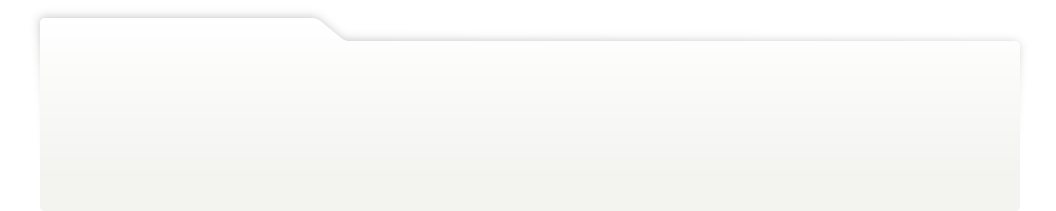
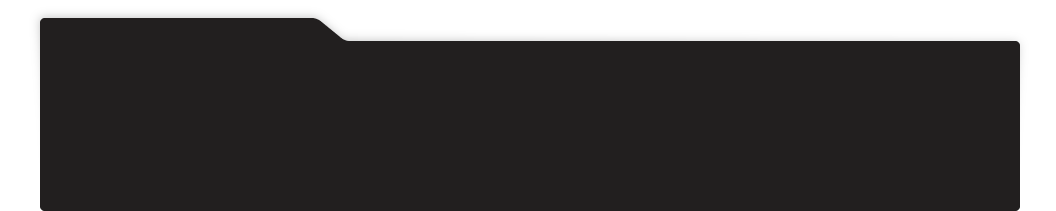
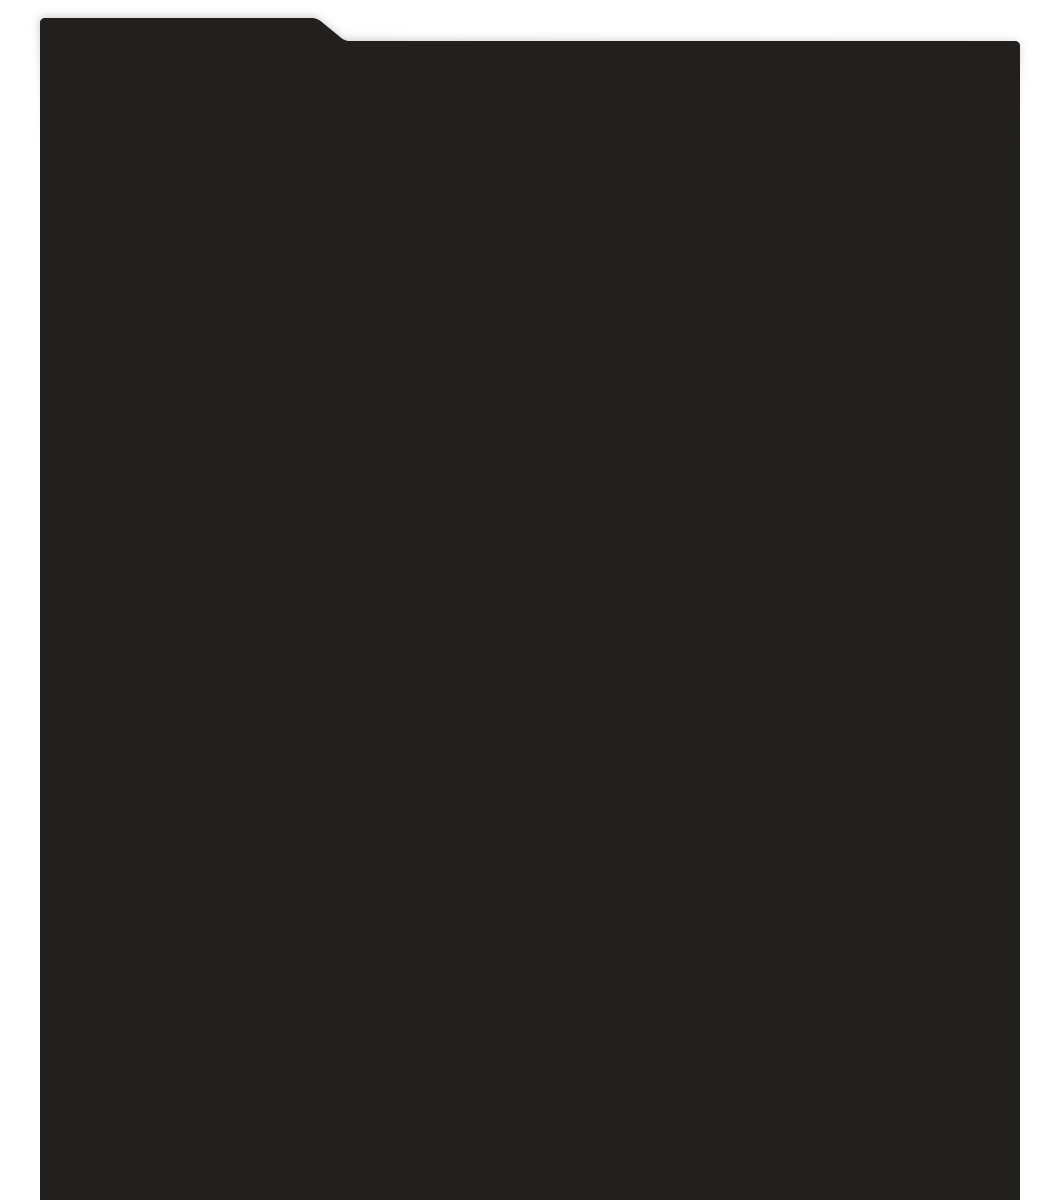
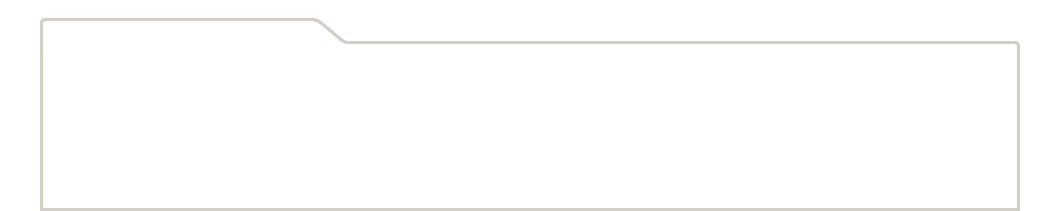
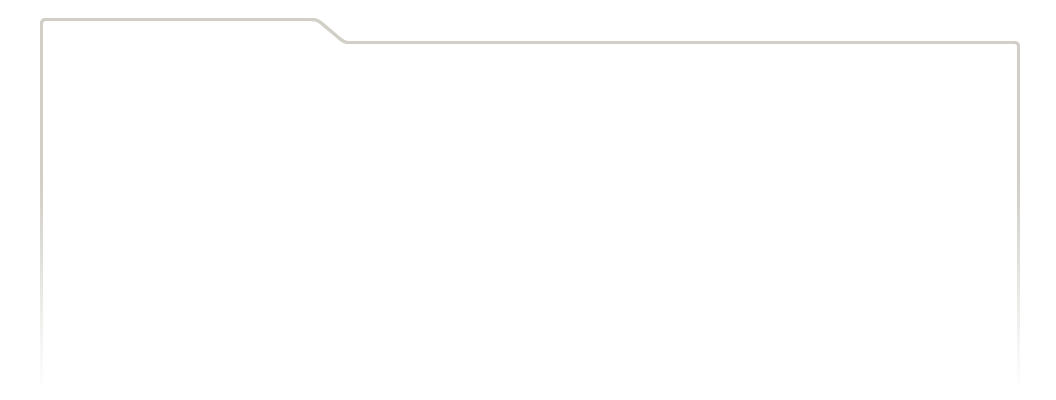
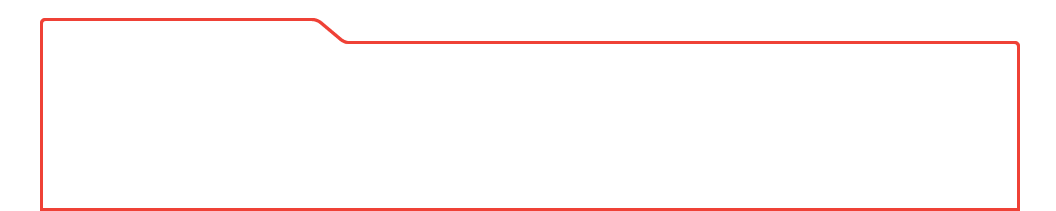
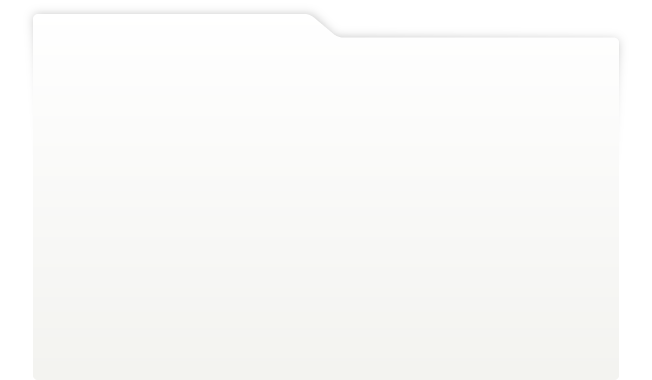
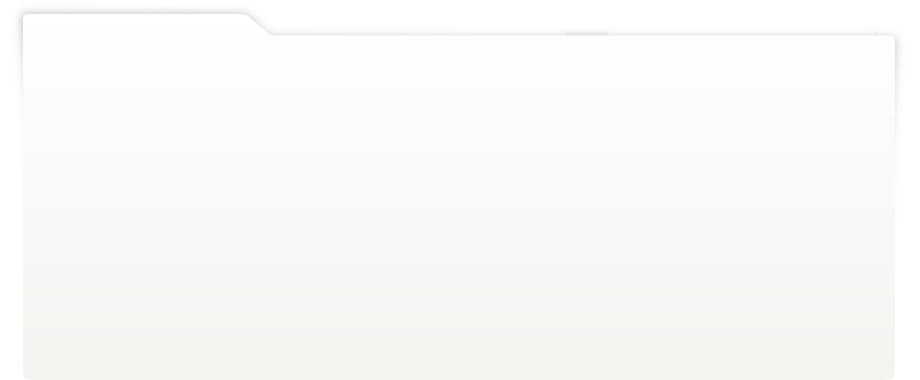
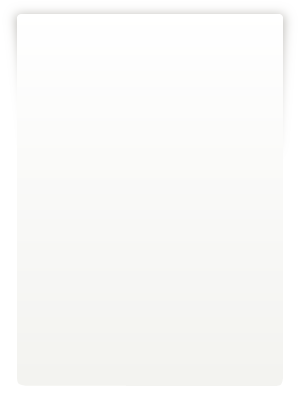
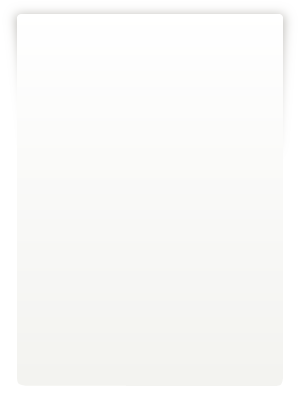
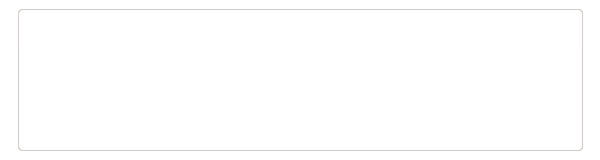
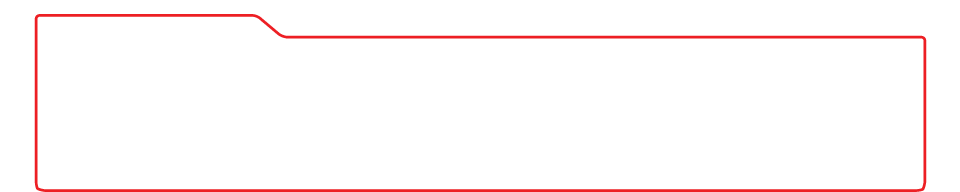
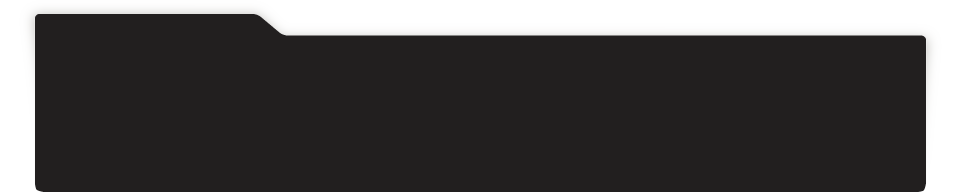
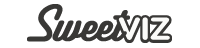
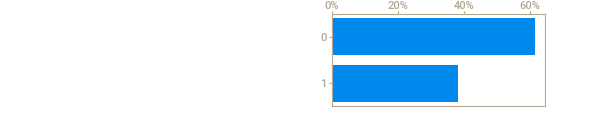
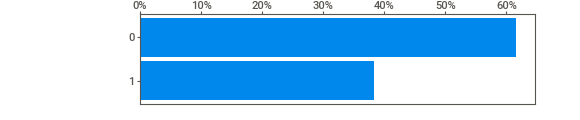
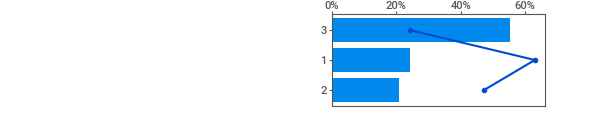
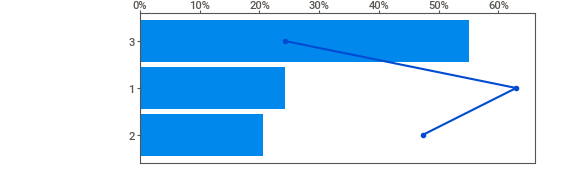
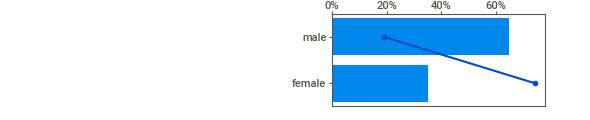
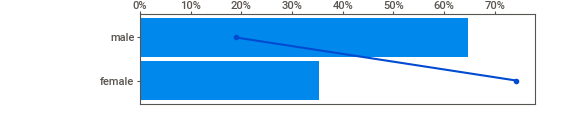
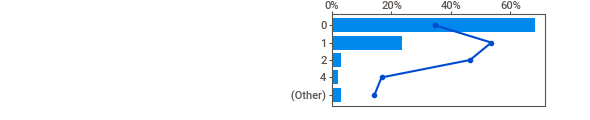
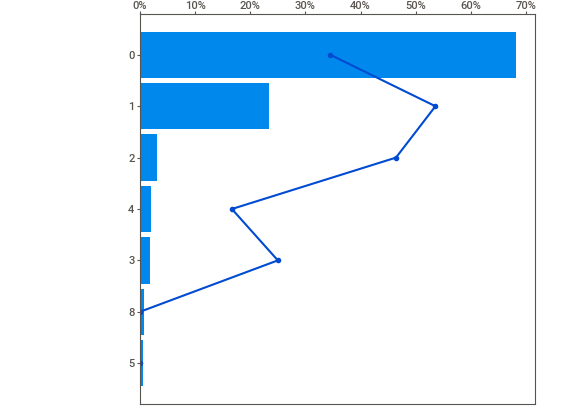
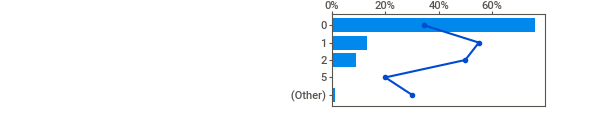
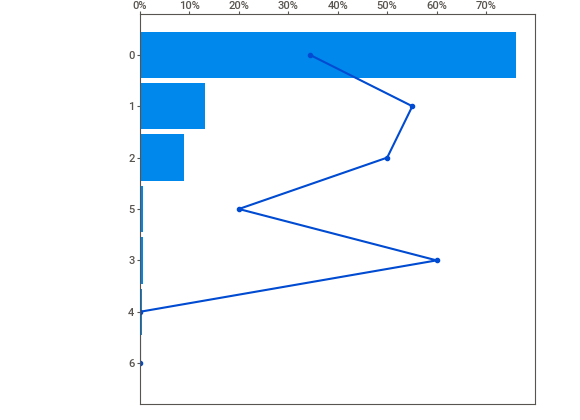
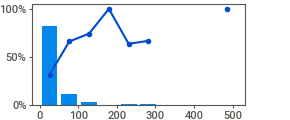
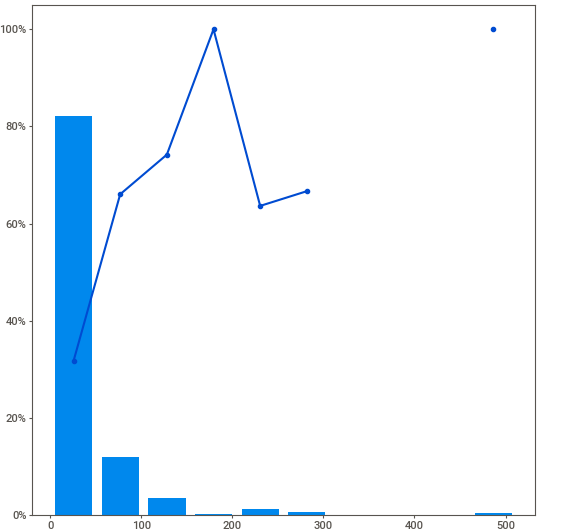
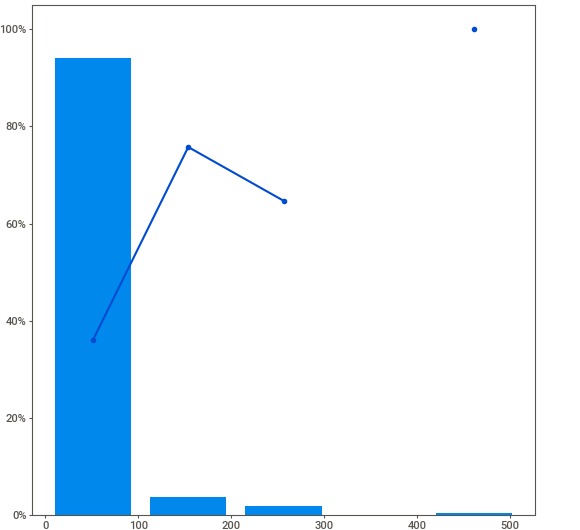
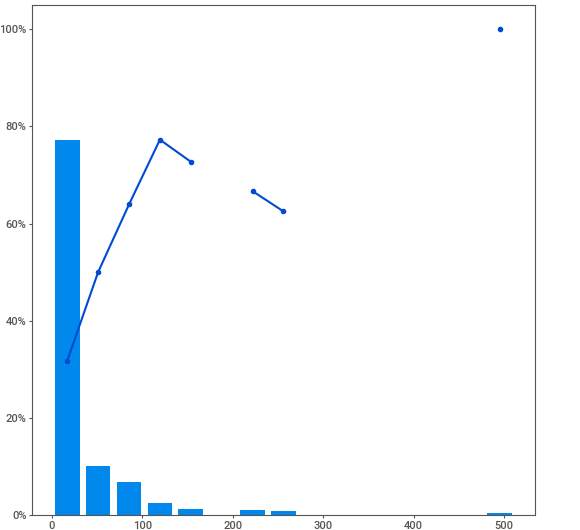
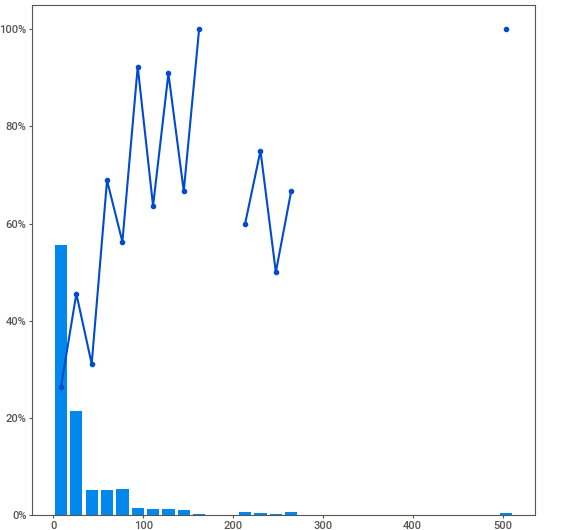
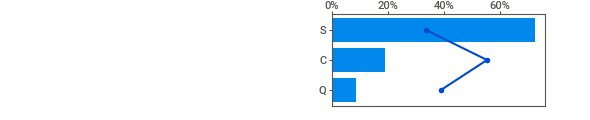
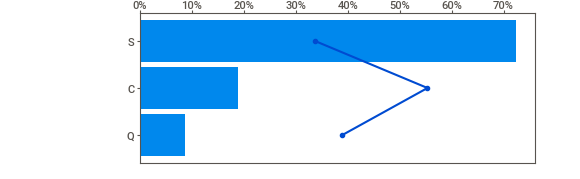
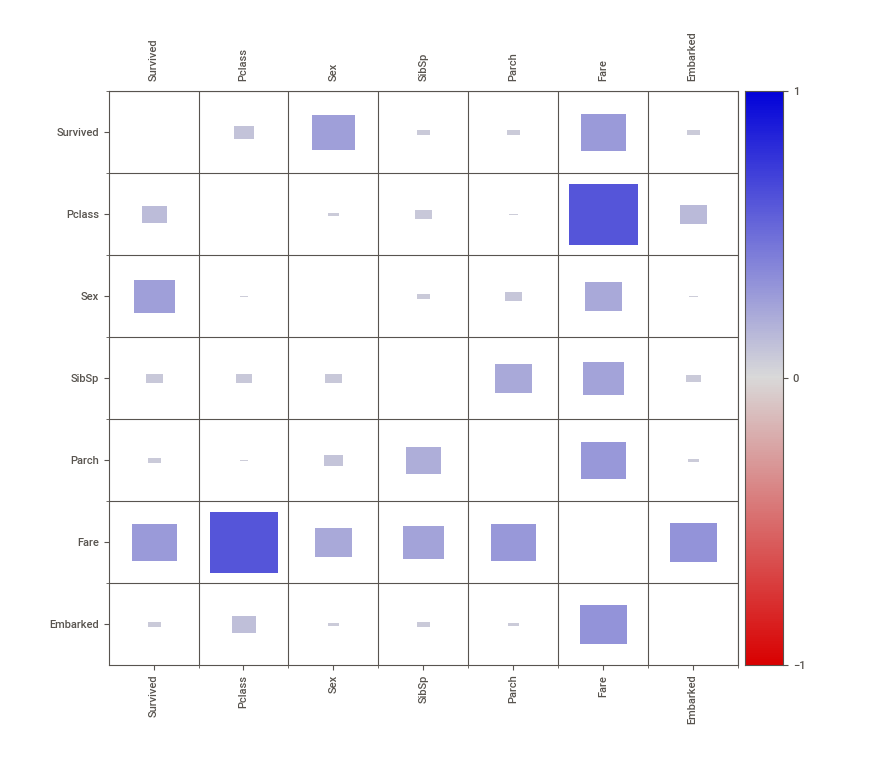
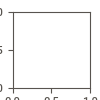

In [ ]:
informe.show_notebook(w=None, h=None, scale=None,layout='widescreen',filepath=None)

In [ ]:
import sqlite3
conn = sqlite3.connect('/content/drive/MyDrive/Datos/Tiendas24H.sqlite')

In [ ]:
consulta = "SELECT C.Ticket, Fecha, D.ImporteVenta , D.Cantidad , D.ImporteCoste , ImporteVenta - ImporteCoste as 'Margen' , D.CodProducto , C.CodTienda FROM VentasCAB C INNER JOIN VentasDET D ON C.Ticket = D.Ticket"

In [ ]:
df = pd.read_sql(consulta , conn)

In [ ]:
informe = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)


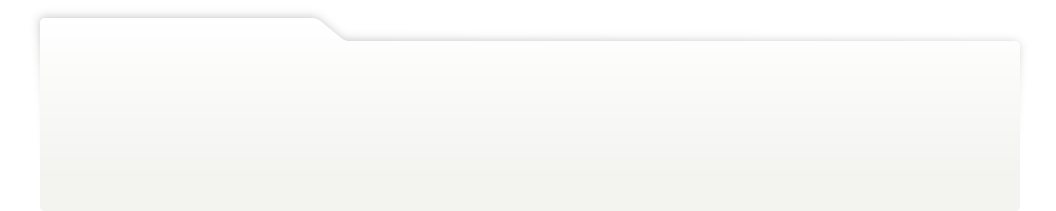
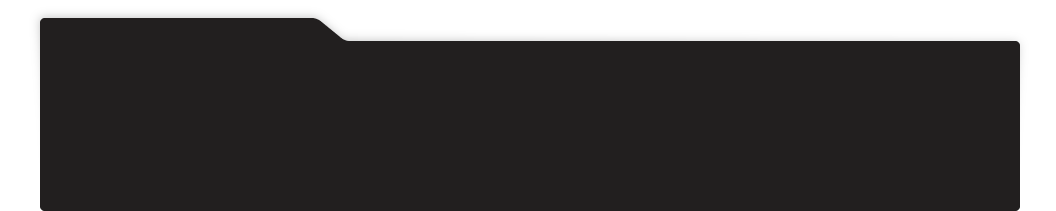
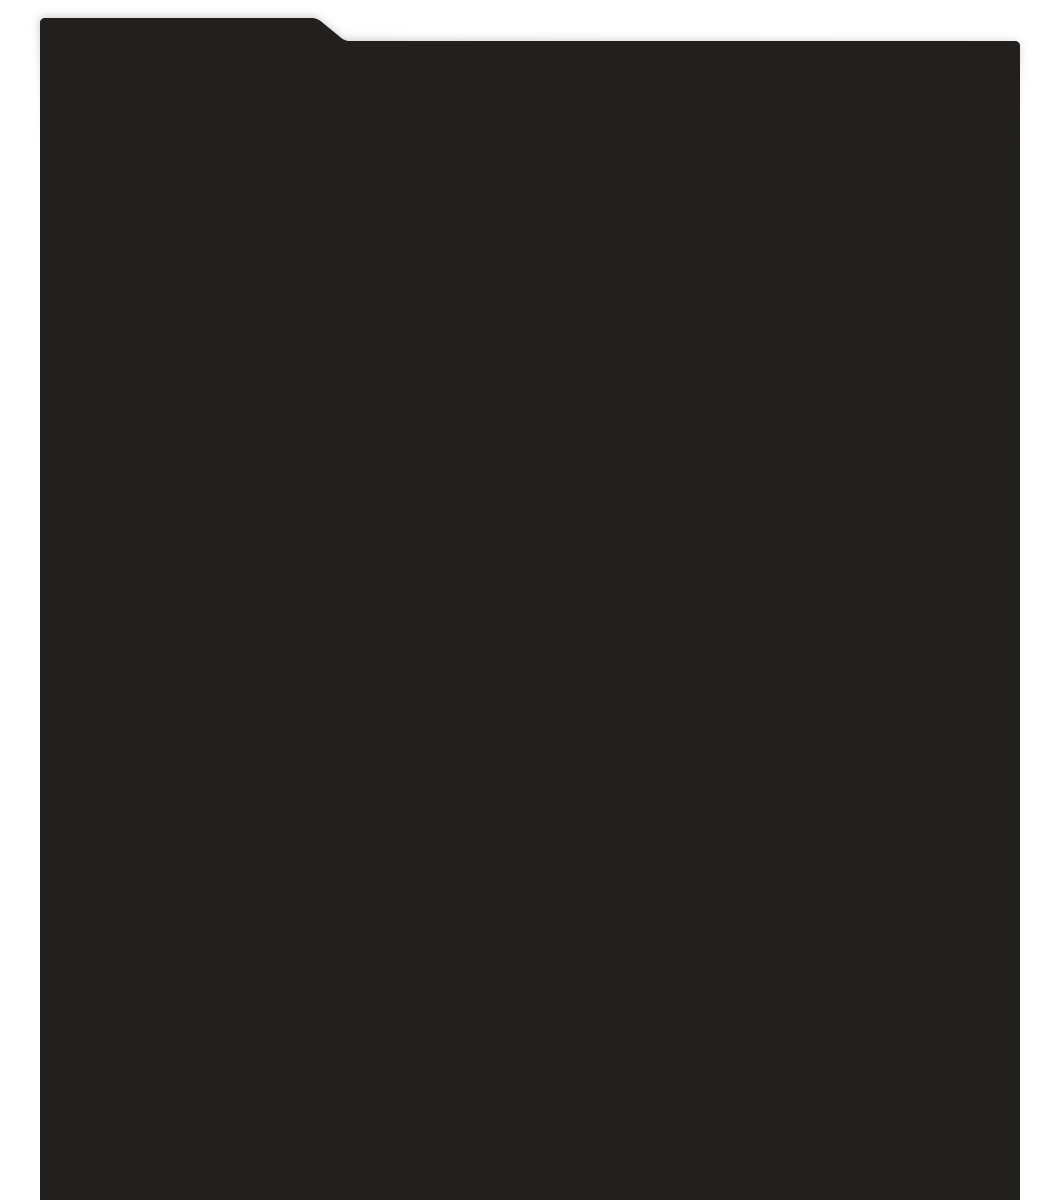
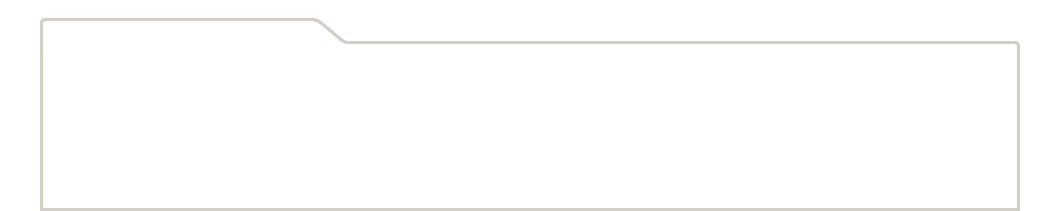
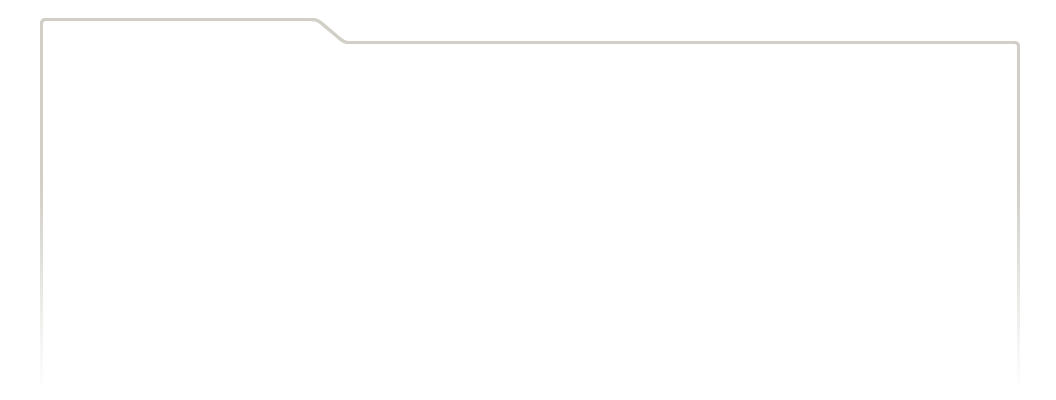
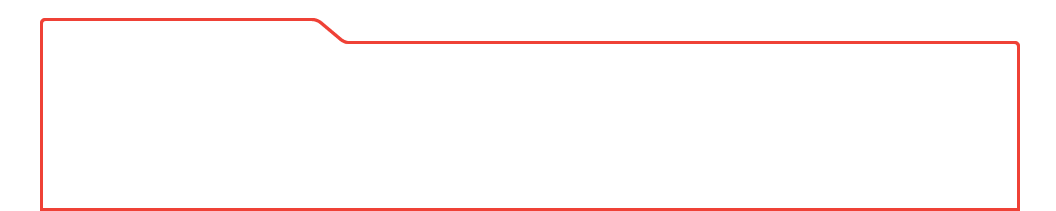
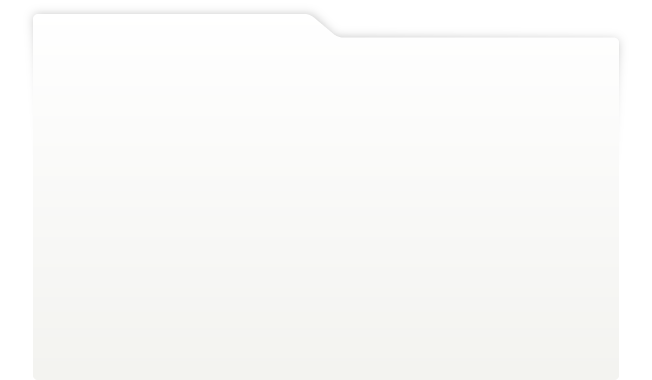
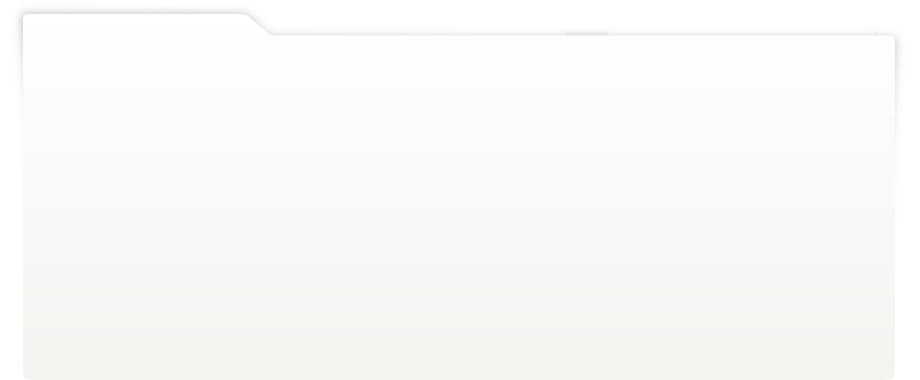
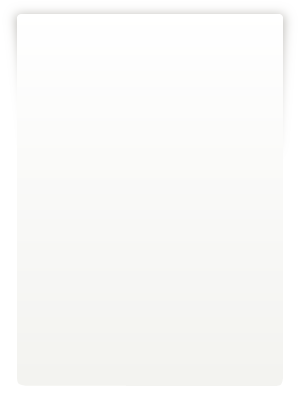
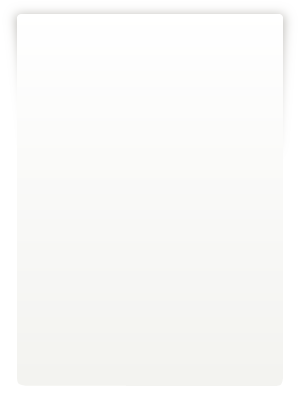
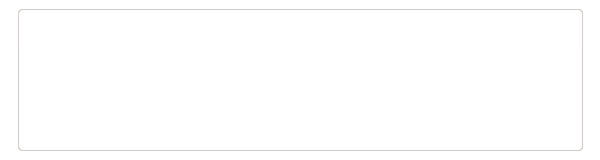
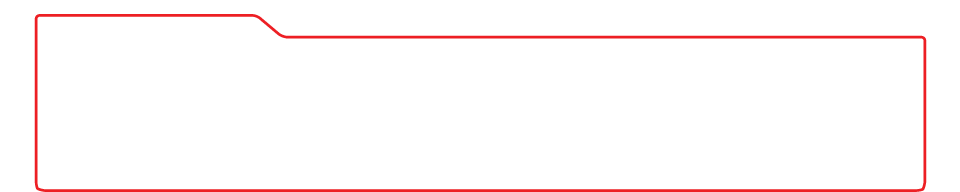
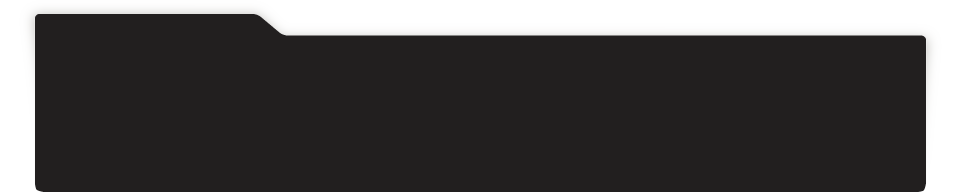
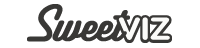
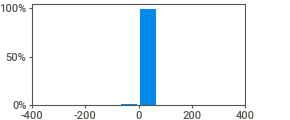
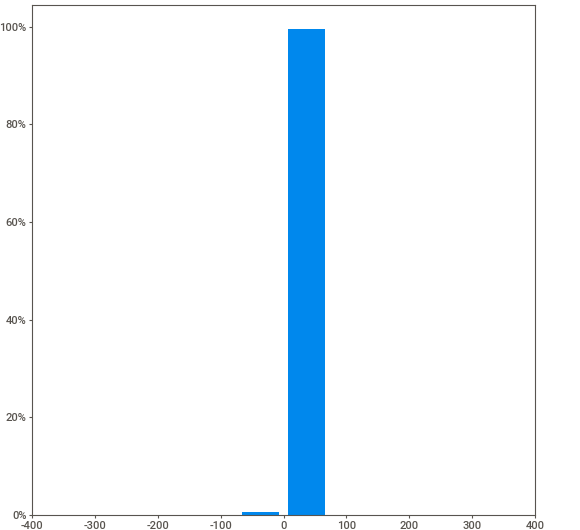
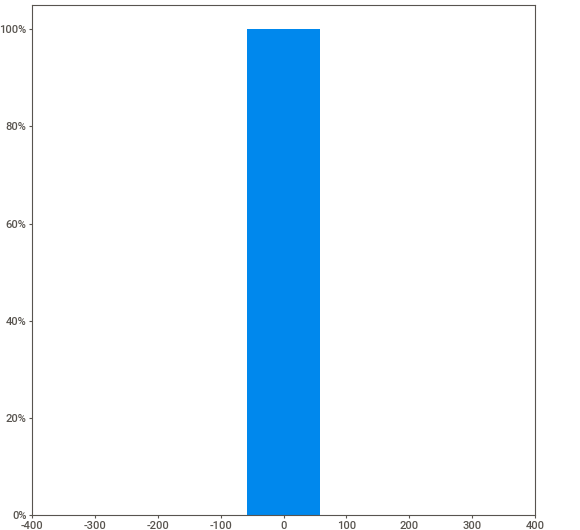
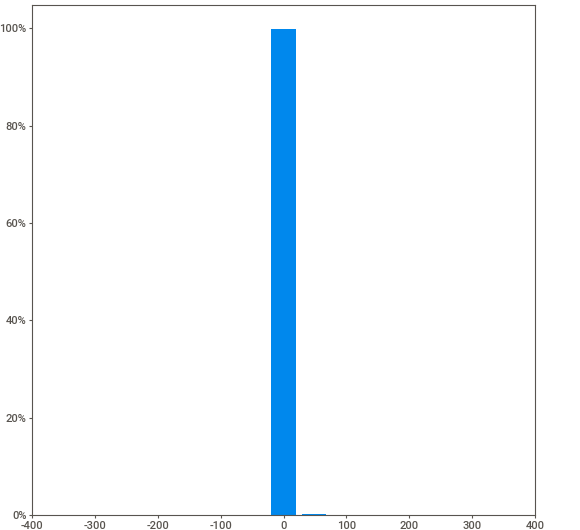
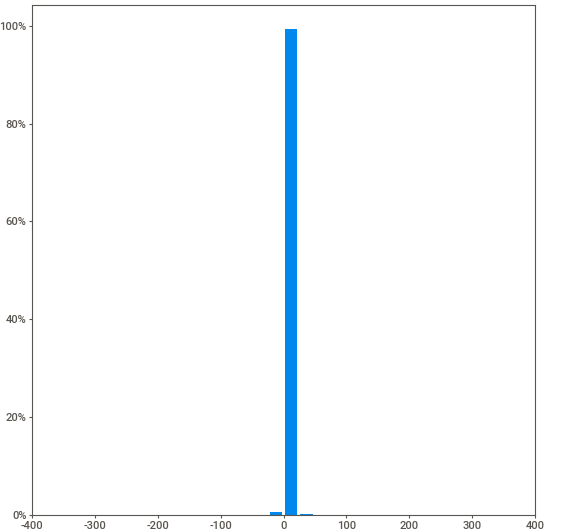
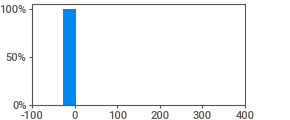
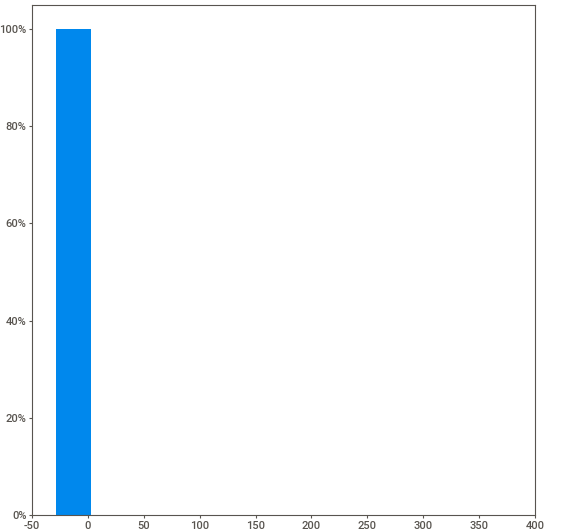
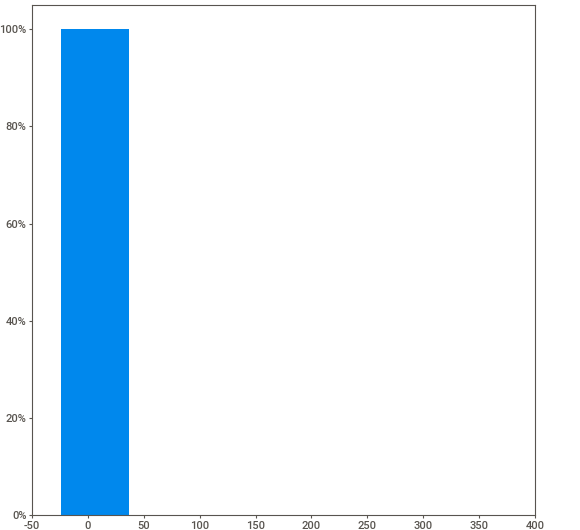
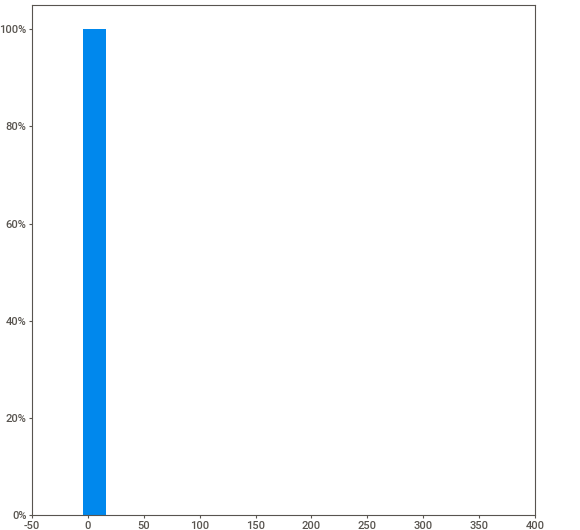
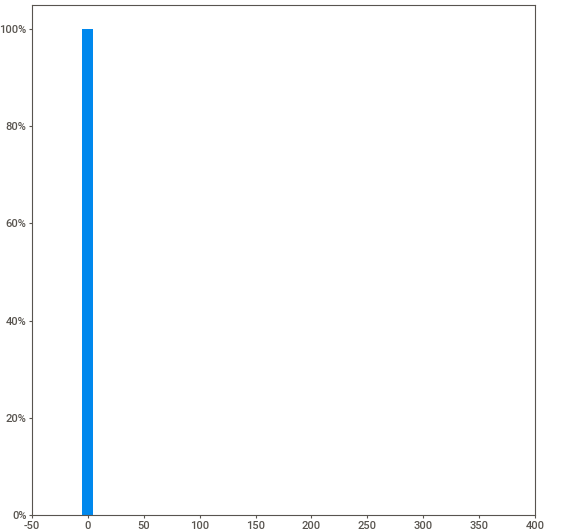
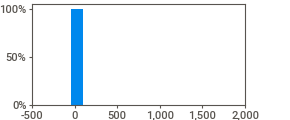
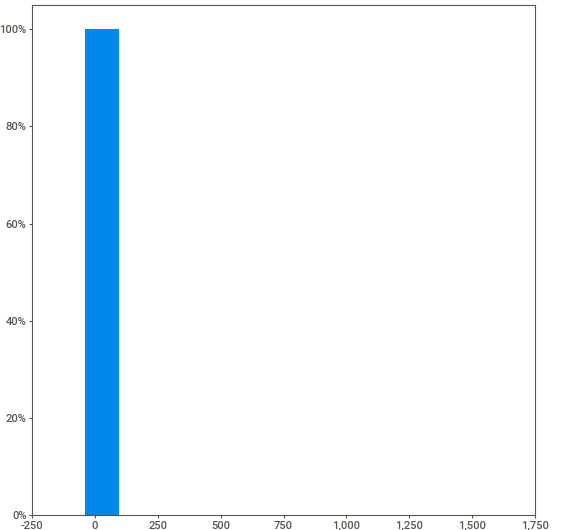
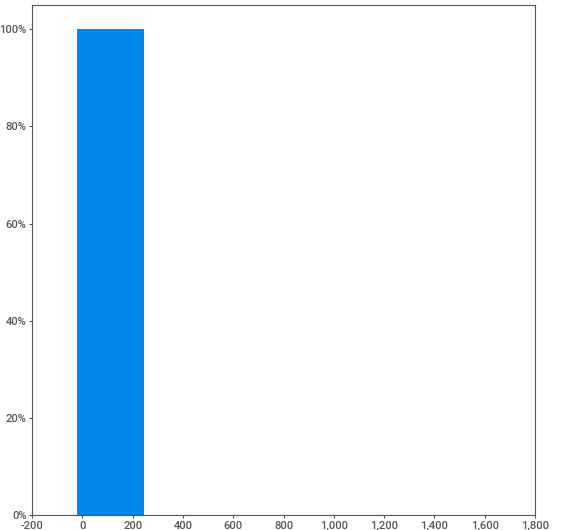
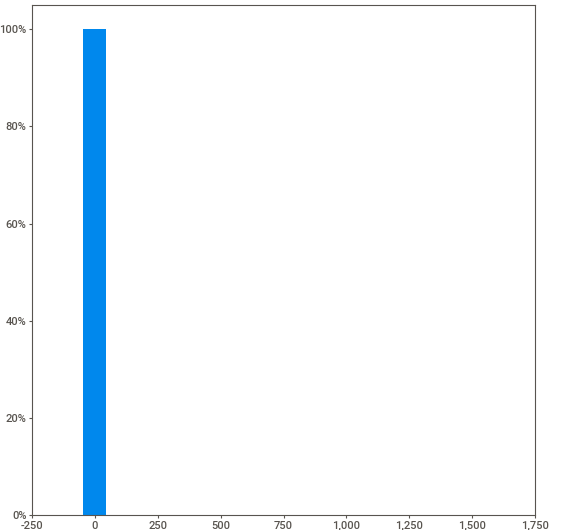
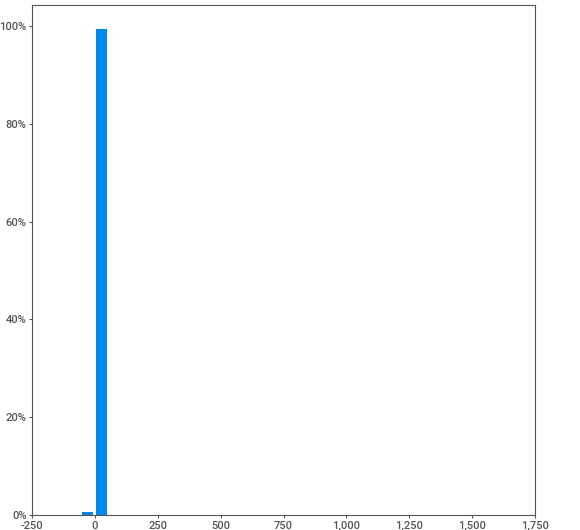
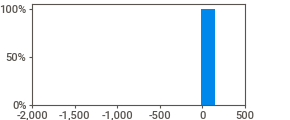
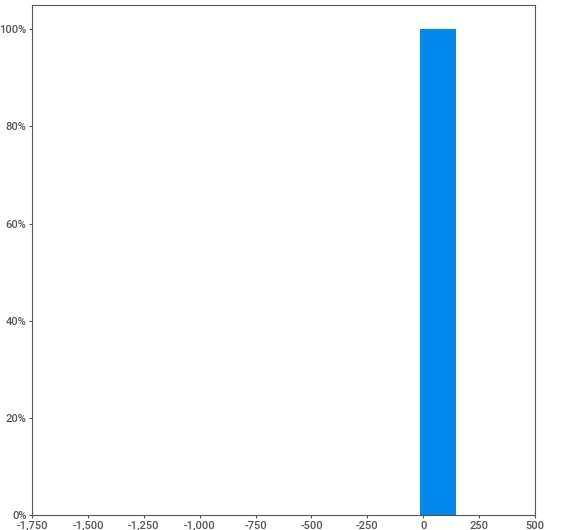
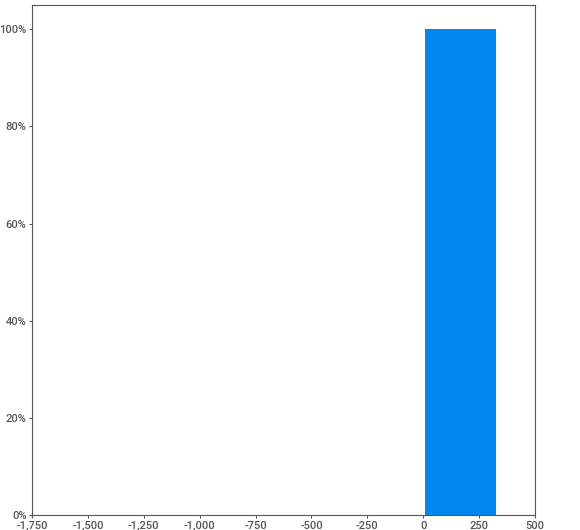
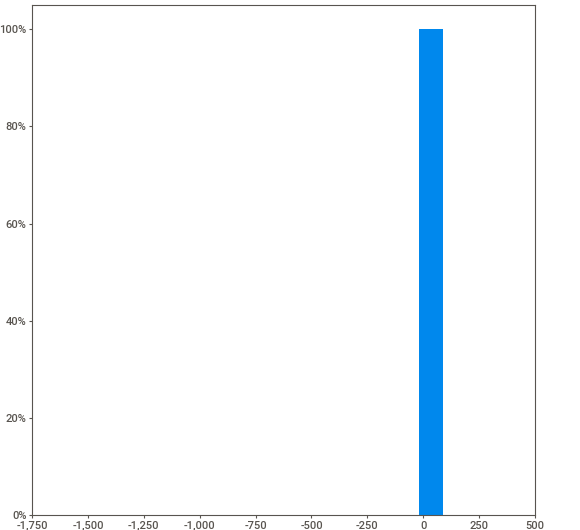
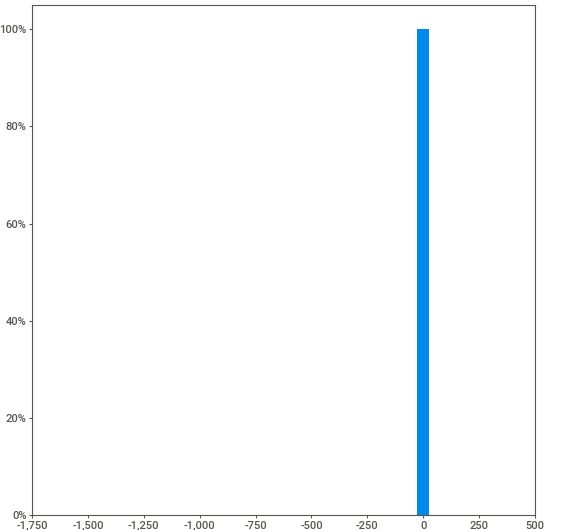
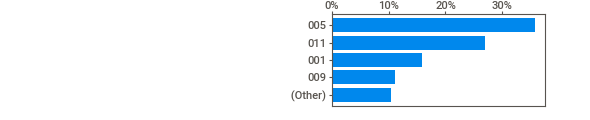
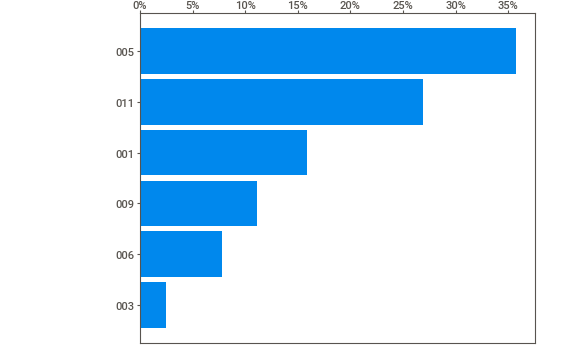
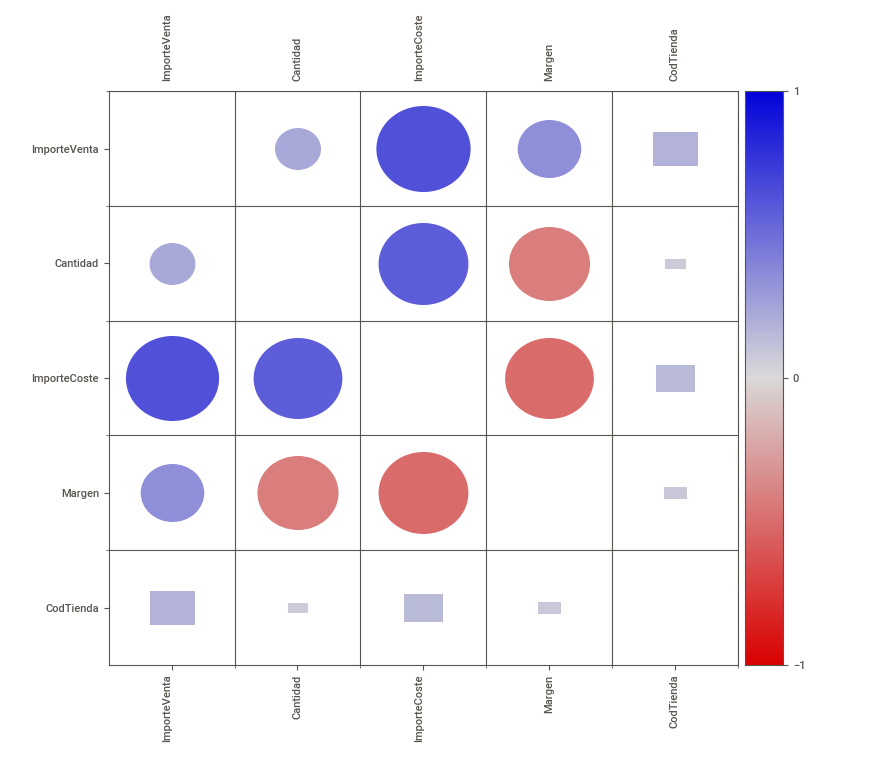
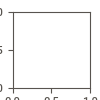

In [ ]:
informe.show_notebook(w=None, h=None, scale=None,layout='widescreen',filepath=None)

In [ ]:
informe.show_html("ventas.html")

Report ventas.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
